<a href="https://colab.research.google.com/github/m3y54m/ut-nndl-course/blob/master/miniproj2/miniproj2_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [0]:
trainset_size = x_train.shape[0]
testset_size = x_test.shape[0]
batch_size = 100
steps_per_epoch = np.ceil(trainset_size / batch_size).astype('int')
num_classes = 10
epochs = 100
# input shape: (32, 32, 3)
input_shape = x_train.shape[1:]

data_augmentation = False
#num_predictions = 20

print(trainset_size, 'train samples')
print(testset_size, 'test samples')

50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary (one-hot) class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
__________

In [0]:
# initiate RMSprop optimizer
#opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [0]:
# Let's train the model using AdamOptimizer
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Normalize input numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
results = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.4670 - acc: 0.4697 - val_loss: 1.1890 - val_acc: 0.5786
Epoch 2/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.0494 - acc: 0.6334 - val_loss: 0.9650 - val_acc: 0.6658
Epoch 3/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.8799 - acc: 0.6942 - val_loss: 0.8858 - val_acc: 0.6974
Epoch 4/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.7659 - acc: 0.7331 - val_loss: 0.7969 - val_acc: 0.7245
Epoch 5/100
50000/50000 [==============================] - 7s 143us/step - loss: 0.6720 - acc: 0.7673 - val_loss: 0.7853 - val_acc: 0.7319
Epoch 6/100
50000/50000 [==============================] - 7s 143us/step - loss: 0.5907 - acc: 0.7936 - val_loss: 0.7872 - val_acc: 0.7289
Epoch 7/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.5131 - acc: 0.8197 - val_loss: 0.

In [0]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 102us/step
Test loss: 2.6992036222457885
Test accuracy: 0.7319


In [0]:
# Loss and Accuracy for Training Dataset
plt_loss = results.history["loss"]
plt_acc = results.history["acc"]
# Loss and Accuracy for Validation (Test) Dataset
plt_val_loss = results.history["val_loss"]
plt_val_acc = results.history["val_acc"]

num_epochs = len(plt_val_acc)
plt_epoch = np.arange(1, num_epochs+1, 1, dtype=int)

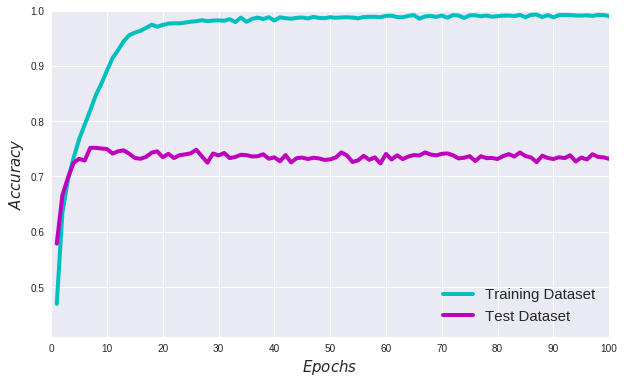

In [0]:
plt.figure(1, figsize=(10, 6))
plt.plot(plt_epoch, plt_acc, color='c', linewidth=4, label='Training Dataset')
plt.plot(plt_epoch, plt_val_acc, color='m', linewidth=4, label='Test Dataset')
plt.xlim(1, epochs)
plt.ylim(0.41, 1.0)
plt.xticks(np.arange(0, num_epochs+1, 10, dtype=int))
plt.legend(loc='lower right', fontsize=15)
plt.xlabel(r'$Epochs$', fontsize=15)
plt.ylabel(r'$Accuracy$', fontsize=15)
plt.grid(True)
plt.show()

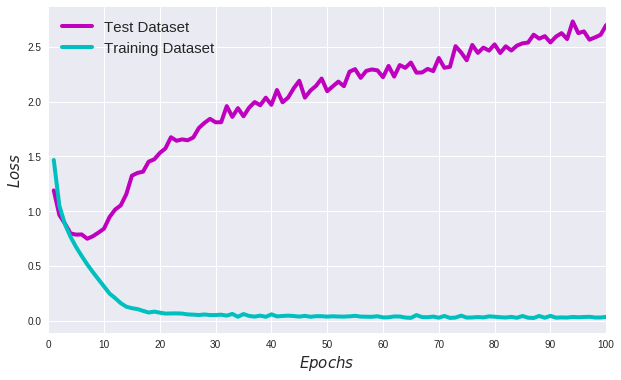

In [0]:
plt.figure(1, figsize=(10, 6))
plt.plot(plt_epoch, plt_val_loss, color='m', linewidth=4, label='Test Dataset')
plt.plot(plt_epoch, plt_loss, color='c', linewidth=4, label='Training Dataset')
plt.xlim(1, epochs)
plt.xticks(np.arange(0, num_epochs+1, 10, dtype=int))
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'$Epochs$', fontsize=15)
plt.ylabel(r'$Loss$', fontsize=15)
plt.grid(True)
plt.show()